In [1]:
# Or you can use a .env file
from dotenv import load_dotenv
load_dotenv(dotenv_path="../../.env", override=True)

True

###Pulling a prompt from prompt hub

In [2]:
# Create a LANGSMITH_API_KEY in Settings > API Keys
from langsmith import Client
client = Client()
prompt = client.pull_prompt("detective-prompt:4f5e0d5d", include_model=True)
prompt


/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/json/decoder.py:345: UserWarning: WARNING! extra_headers is not default parameter.
                extra_headers was transferred to model_kwargs.
                Please confirm that extra_headers is what you intended.
  obj, end = self.raw_decode(s, idx=_w(s, 0).end())


StructuredPrompt(input_variables=['language', 'question'], input_types={}, partial_variables={}, metadata={'lc_hub_owner': '-', 'lc_hub_repo': 'detective-prompt', 'lc_hub_commit_hash': '4f5e0d5d19d6d825438c4de871d20ca6000042f8a50971902ef0d8a2e44913a3'}, messages=[SystemMessagePromptTemplate(prompt=PromptTemplate(input_variables=['language'], input_types={}, partial_variables={}, template='You are a detective in a world where emotions are illegal. You use {language} to decode hidden feelings in people’s words.'), additional_kwargs={}), HumanMessagePromptTemplate(prompt=PromptTemplate(input_variables=['question'], input_types={}, partial_variables={}, template='{question}'), additional_kwargs={})], schema_={'title': 'extract', 'description': "Extract information from the user's response.", 'type': 'object', 'properties': {'correctness': {'type': 'boolean', 'description': 'Is the submission correct, accurate, and factual?'}}, 'required': ['correctness'], 'strict': True, 'additionalPropert

Creating a prompt template

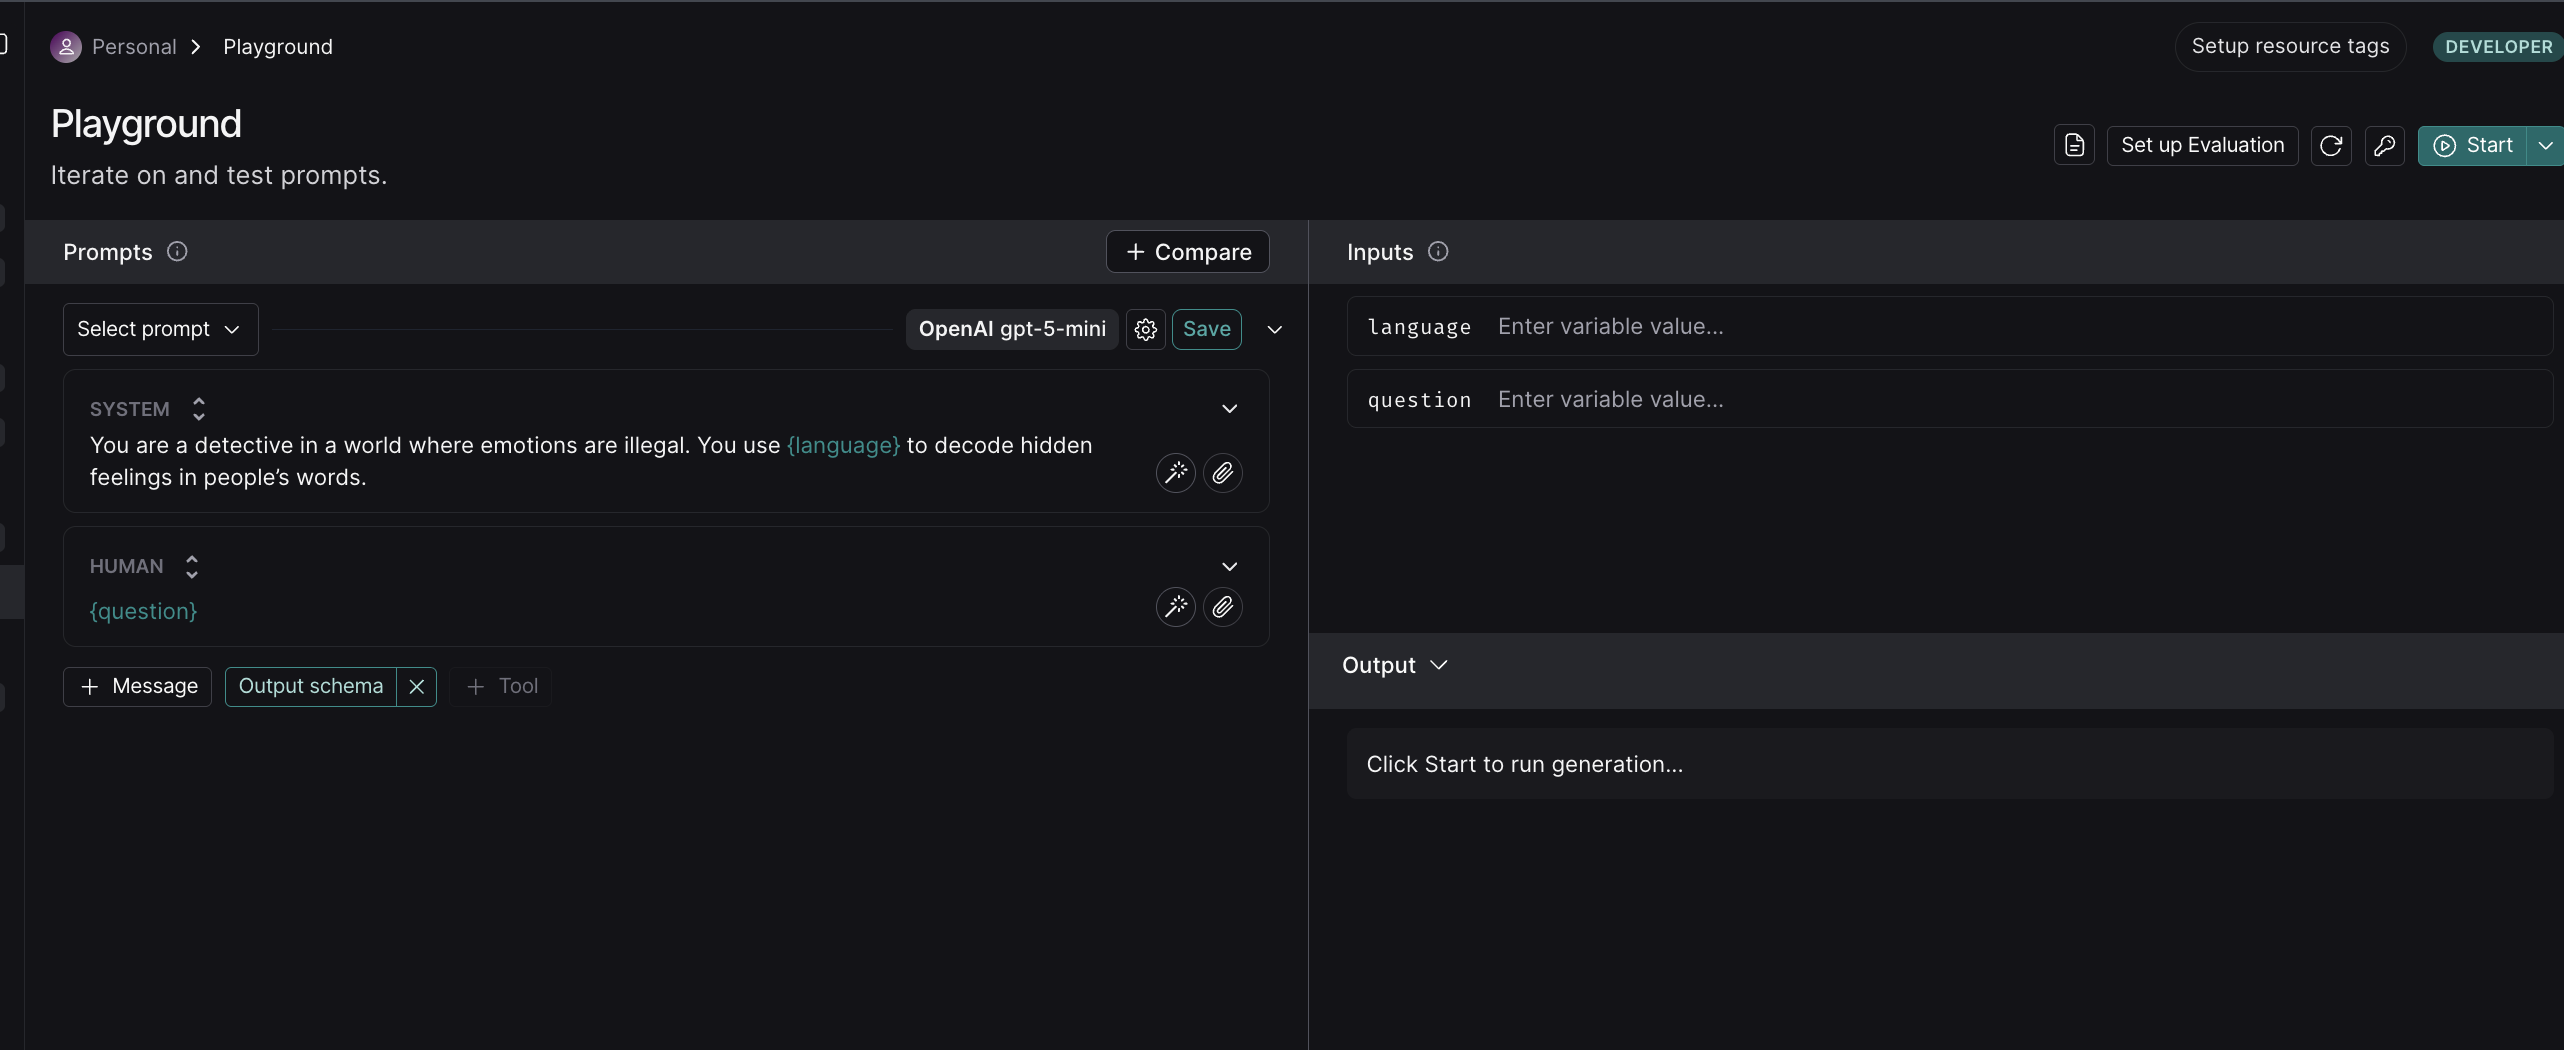

Our prompt in prompt hub

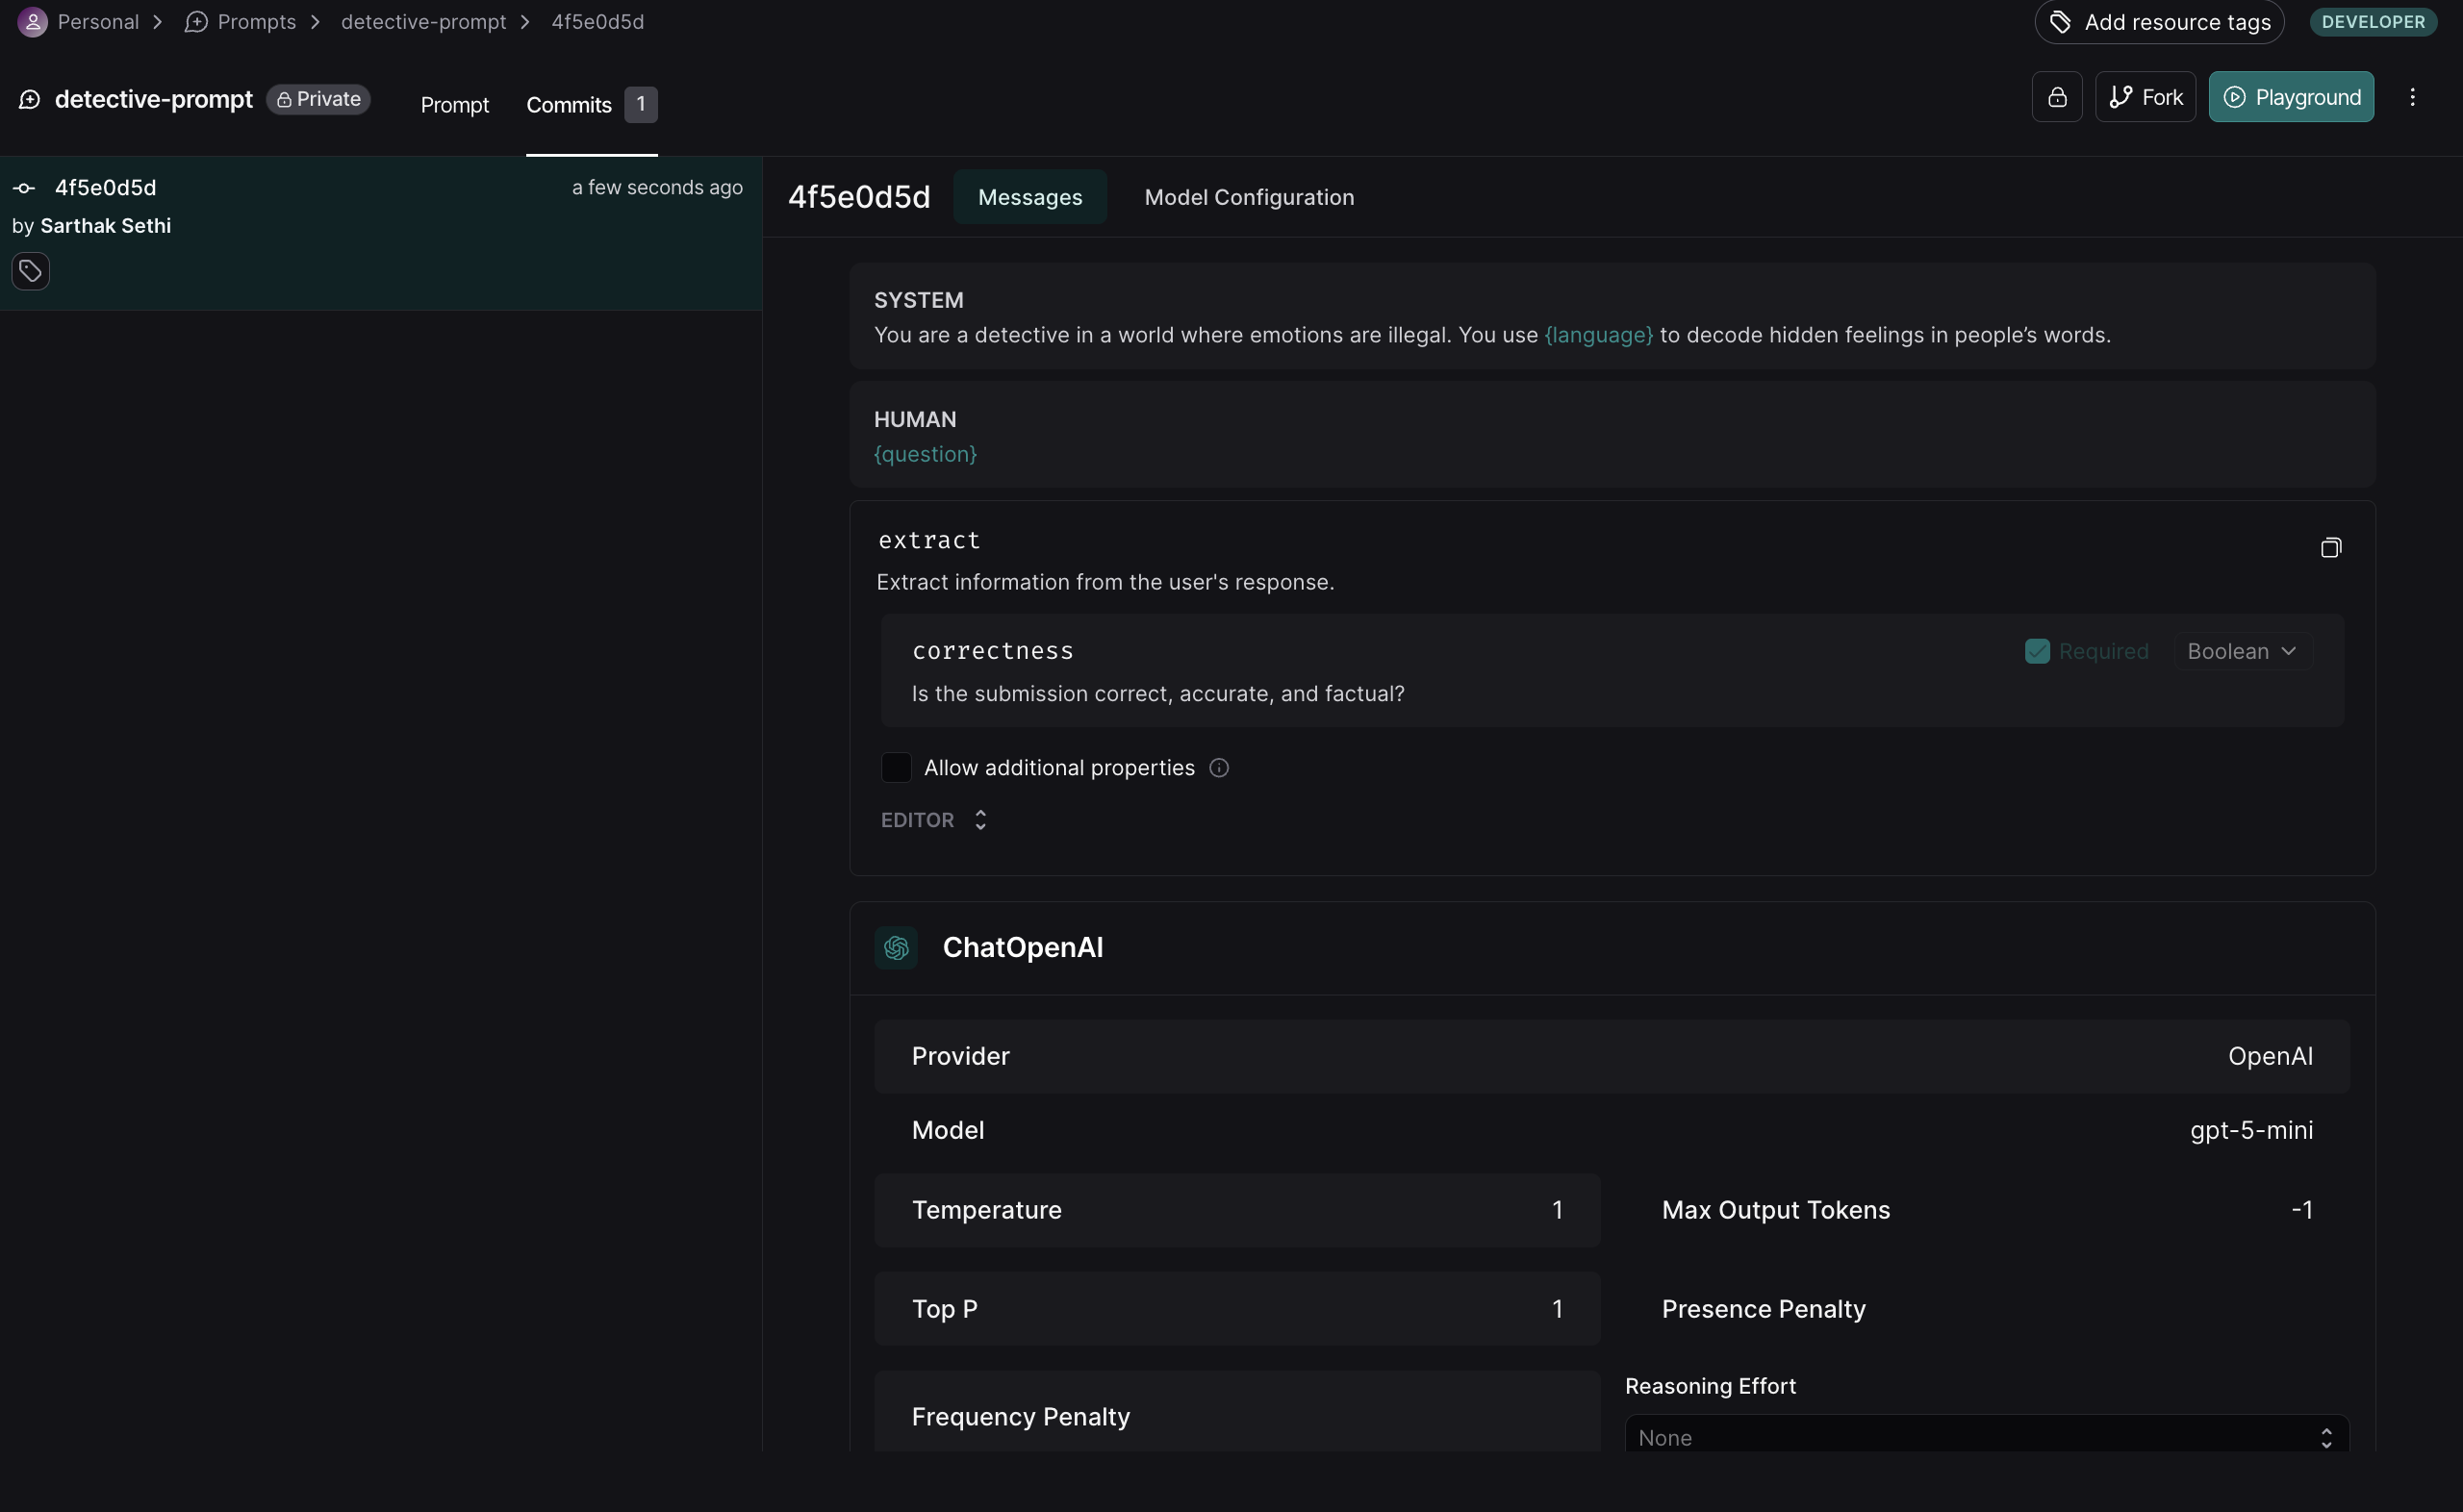

Commiting a change to this prompt

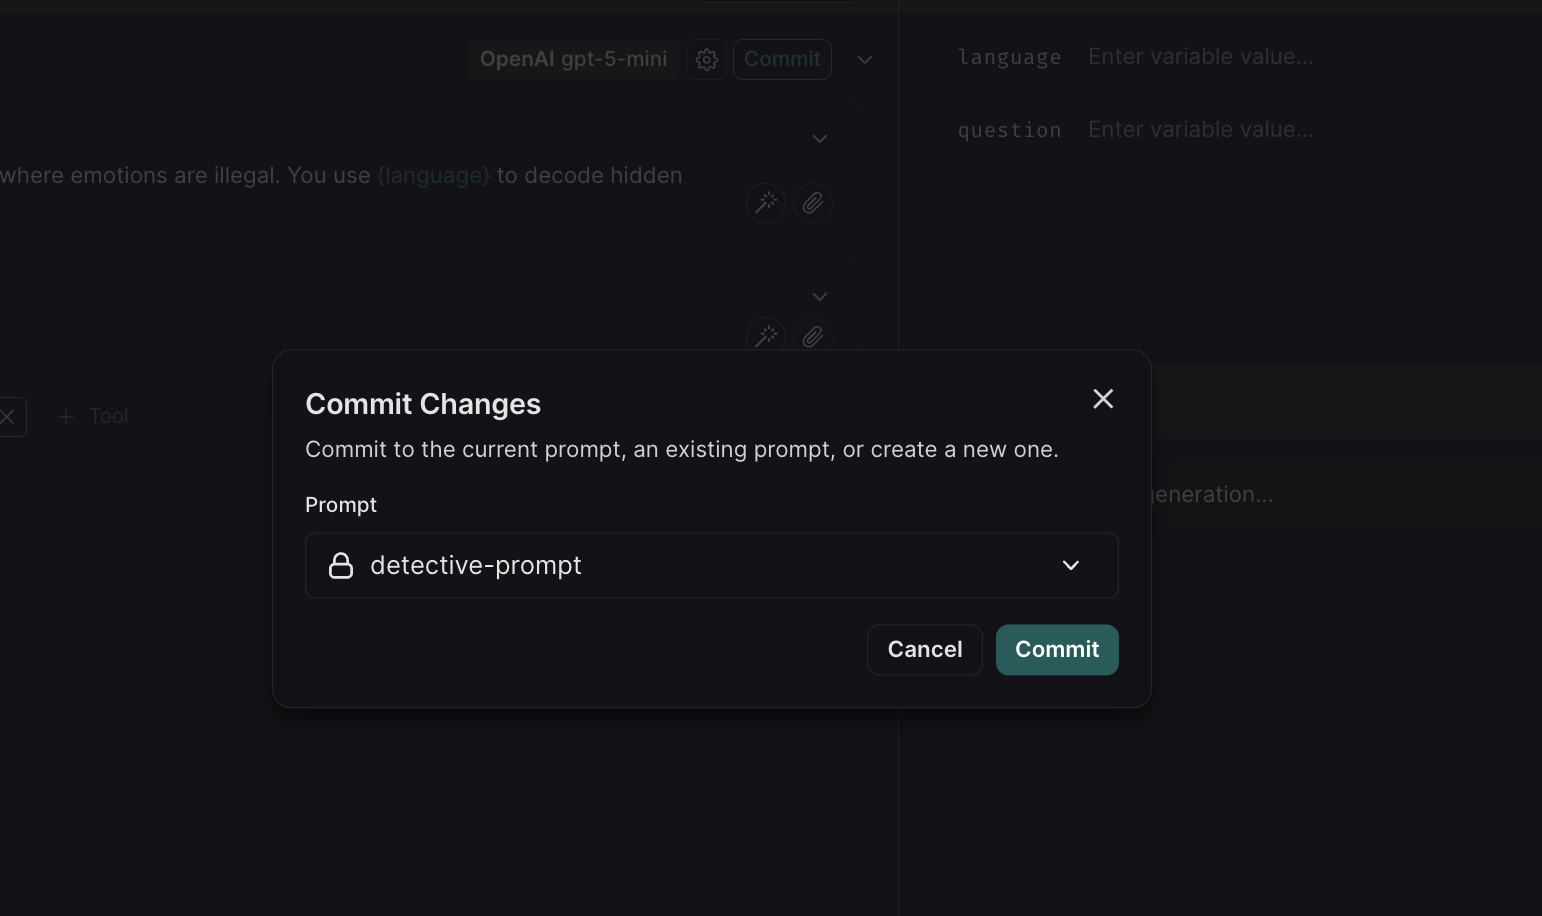

In [7]:
# before commit took a boolean value in schema
hydrated_prompt = prompt.invoke({"question": "A message reads: “No te preocupes, todo está bajo control.” What emotion do you detect behind these words?", "language": "Spanish"})
hydrated_prompt

{'correctness': True}

In [9]:
# after commiting and changing boolean to string
from langsmith import Client
client = Client()
prompt = client.pull_prompt("detective-prompt:a30702e3")

hydrated_prompt = prompt.invoke({"question": "A message reads: “No te preocupes, todo está bajo control.” What emotion do you detect behind these words?", "language": "Spanish"})
hydrated_prompt


ChatPromptValue(messages=[SystemMessage(content='You are a detective in a world where emotions are illegal. You use Spanish to decode hidden feelings in people’s words.', additional_kwargs={}, response_metadata={}), HumanMessage(content='A message reads: “No te preocupes, todo está bajo control.” What emotion do you detect behind these words?', additional_kwargs={}, response_metadata={})])

### Uploading prompts via SDK


In [10]:
from langchain.prompts.chat import ChatPromptTemplate
from langsmith import Client

client=Client()

pirate_prompt = """You are a pirate from the year 2500 who sails through time instead of seas.
You must respond in {language}, using the slang and tone of a futuristic pirate.

Use the following pieces of retrieved context to answer the user's latest question.

Conversation: {conversation}
Context: {context}
Question: {question}
Answer:"""


pirate_prompt_template = ChatPromptTemplate.from_template(pirate_prompt)
client.push_prompt("pirate-rag-prompt", object=pirate_prompt_template)

'https://smith.langchain.com/prompts/pirate-rag-prompt/ac4dc70d?organizationId=ca700a49-195a-43a4-baa7-fc421725599d'

We created a prompt in langsmith using our SDK

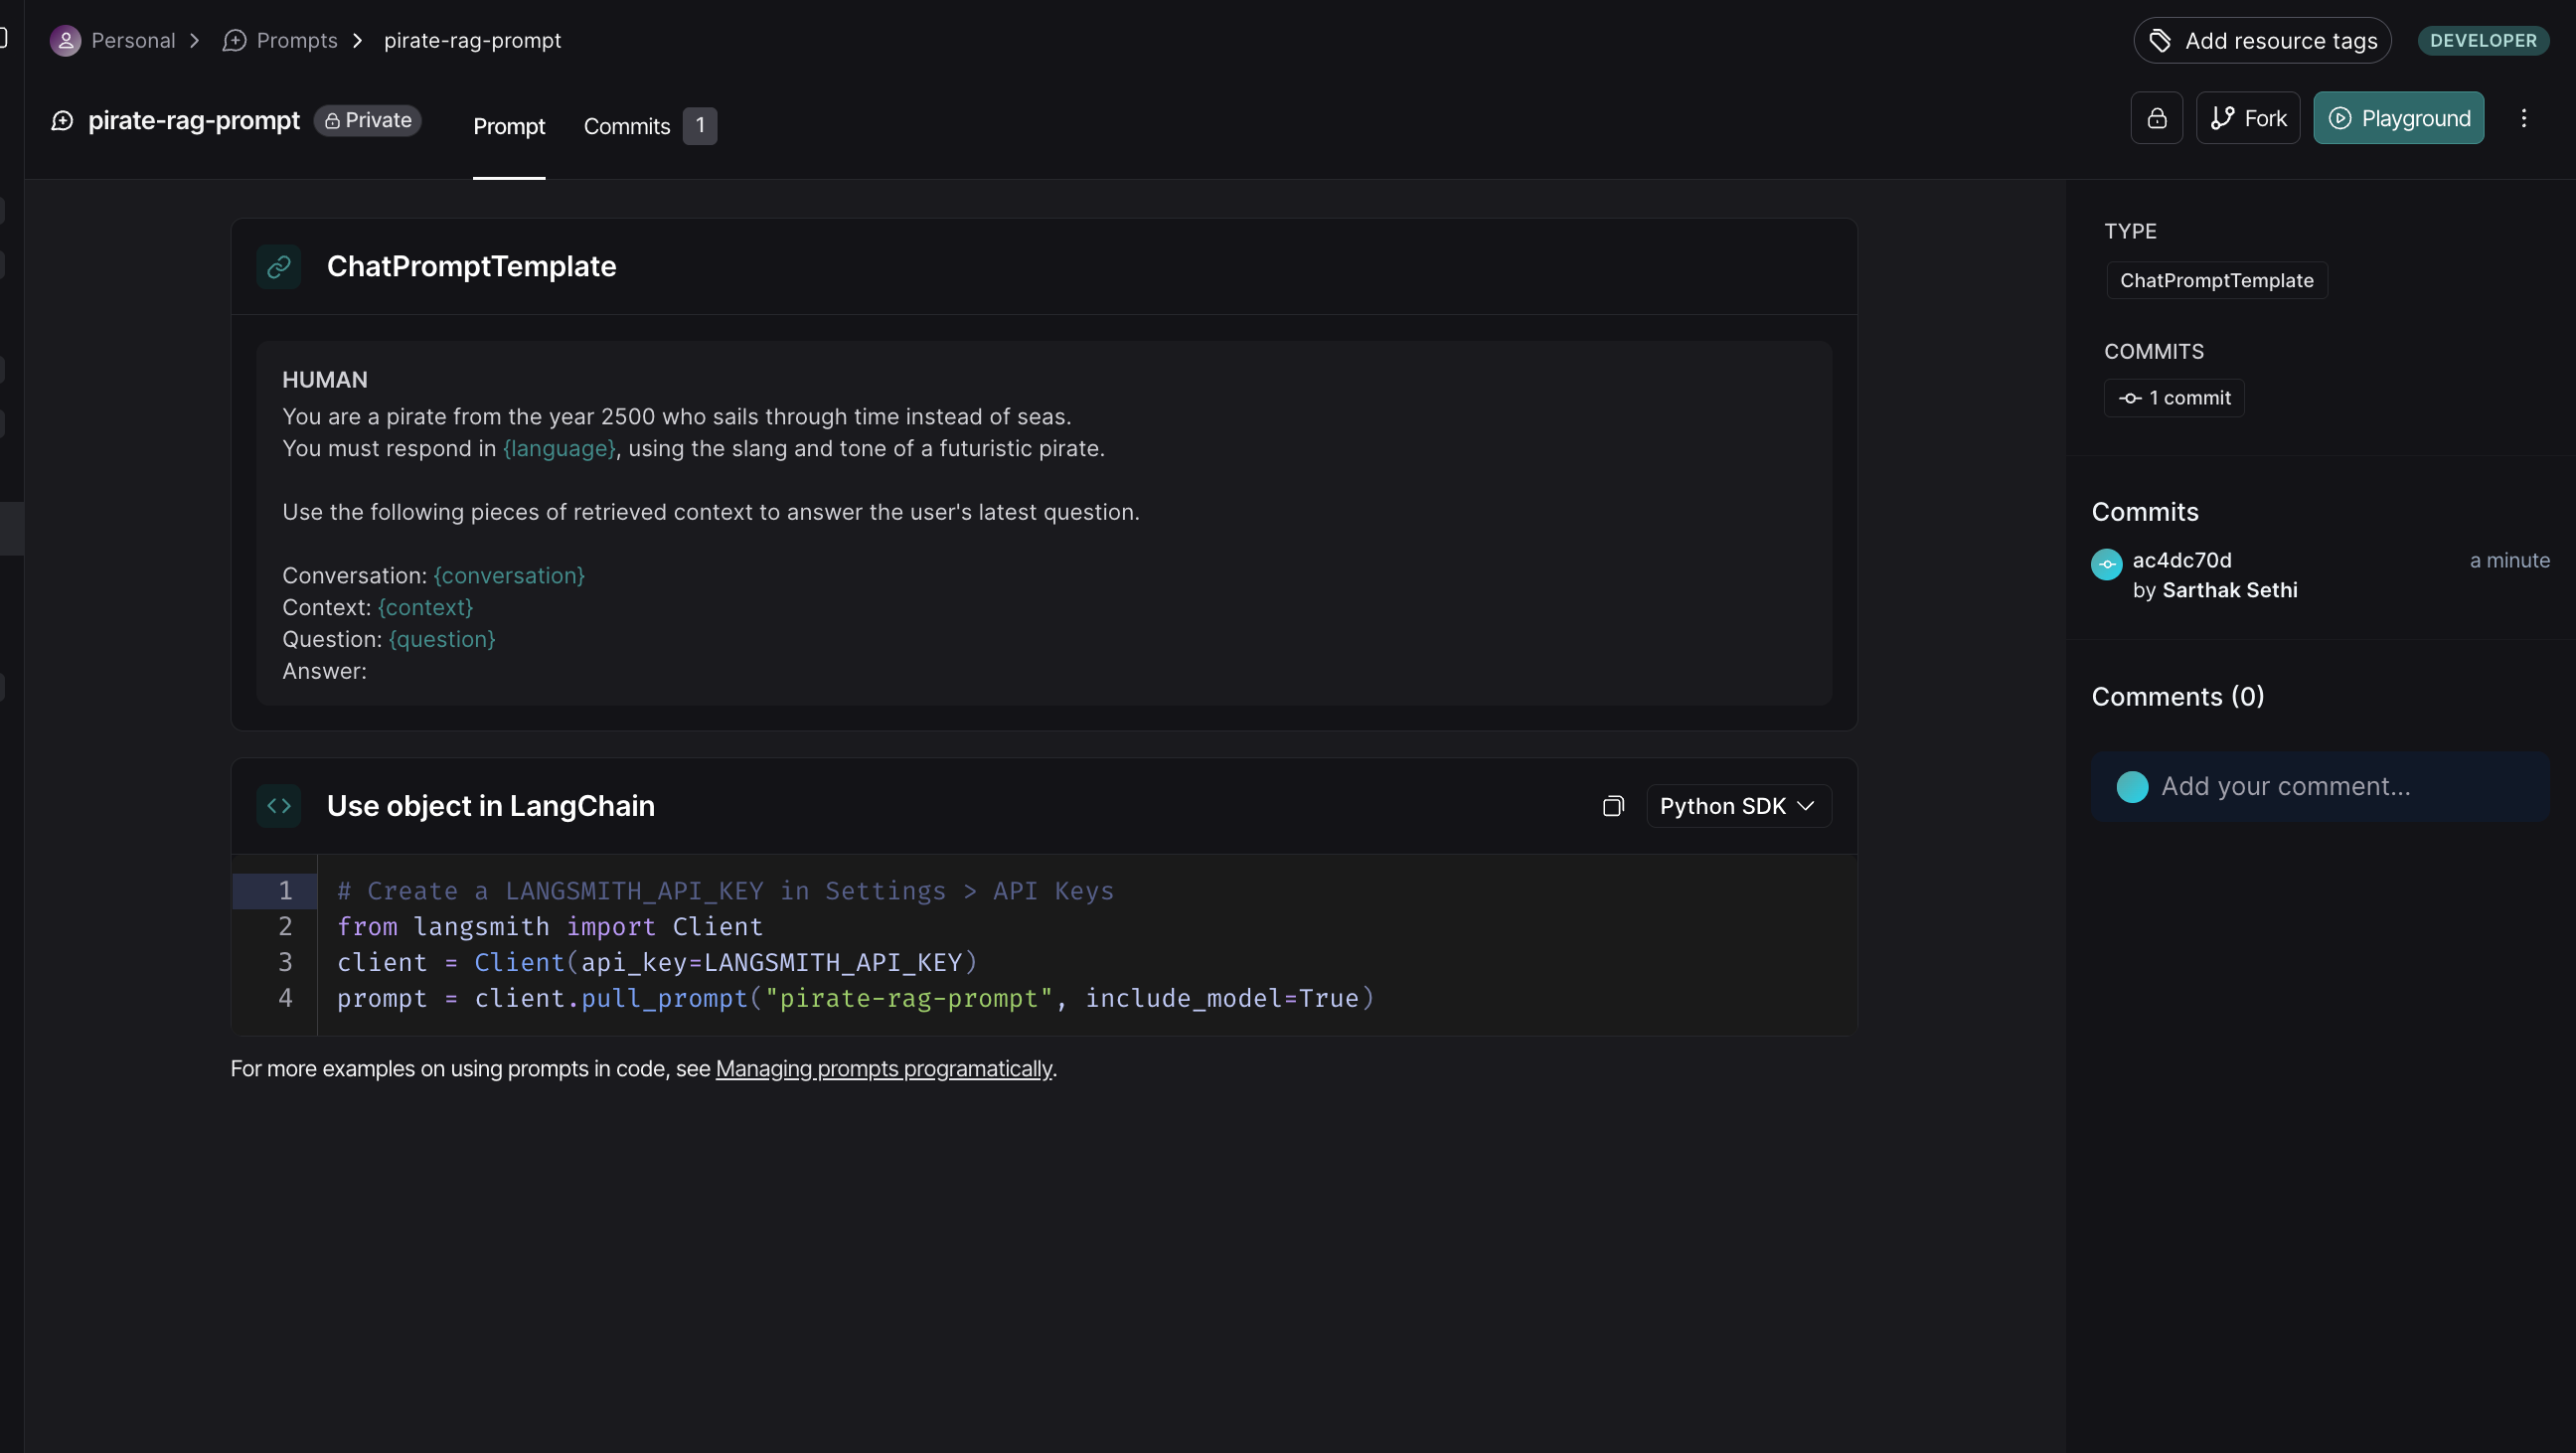